In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import tweepy
from datetime import datetime
import pandas as pd
import json
import sys
from decimal import Decimal
sys.path.append("../")
import numpy as np
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
target_names = ["@BBC","@CBS","@CNN","@FoxNews","@nytimes"]
sentiment_elements=["neg",'neu','pos','compound',"created_at",'text']
index2=pd.MultiIndex.from_product([[str(i) for i in range(100)], target_names],names=['#', 'Source'])

tweet_df=pd.DataFrame(columns=sentiment_elements,index=index2)

for name in target_names:
        public_tweets = api.user_timeline(screen_name=name,count=100,tweet_mode='extended')
        i=-1
        for tweet in public_tweets:

            i+=1 
            result= analyzer.polarity_scores(tweet["full_text"])
            tweet_df.loc[(str(i),name),"compound"]=result["compound"]
            tweet_df.loc[(str(i),name),"pos"]=result["pos"]
            tweet_df.loc[(str(i),name),"neu"]=result["neu"]
            tweet_df.loc[(str(i),name),"neg"]=result["neg"]
            tweet_df.loc[(str(i),name),"created_at"]=datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
            tweet_df.loc[(str(i),name),"text"]=tweet["full_text"]
    
tweet_df['Tweets ago']=tweet_df.index.get_level_values(0)
tweet_df['Tweets ago']=pd.to_numeric(tweet_df['Tweets ago']);
tweet_df['compound']=pd.to_numeric(tweet_df['compound']);
tweet_df.head()
tweet_df=tweet_df.reset_index(level=[0,1])
tweet_df.head()

,#,Source,neg,neu,pos,compound,created_at,text,Tweets ago
0,0,@BBC,0,0.846,0.154,0.4939,2018-10-03 19:04:04+00:00,The search for Lord Sugar's next business part...,0
1,0,@CBS,0.226,0.774,0,-0.3875,2018-10-04 00:34:37+00:00,@shygirlsue @Ranker And we couldn't be prouder...,0
2,0,@CNN,0.217,0.783,0,-0.5574,2018-10-04 00:46:00+00:00,More than 250 people around the world have die...,0
3,0,@FoxNews,0.202,0.798,0,-0.5106,2018-10-04 00:47:03+00:00,Inmates at Irish prison allegedly have Chinese...,0
4,0,@nytimes,0,1,0,0.0000,2018-10-04 00:47:03+00:00,In our On Politics newsletter: The most out-th...,0


In [9]:
tweet_df=tweet_df.sort_values(by="created_at")
sentiment_data=tweet_df[["Source","compound","Tweets ago"]].pivot(index="Tweets ago",columns="Source",values="compound");

<IPython.core.display.Javascript object>


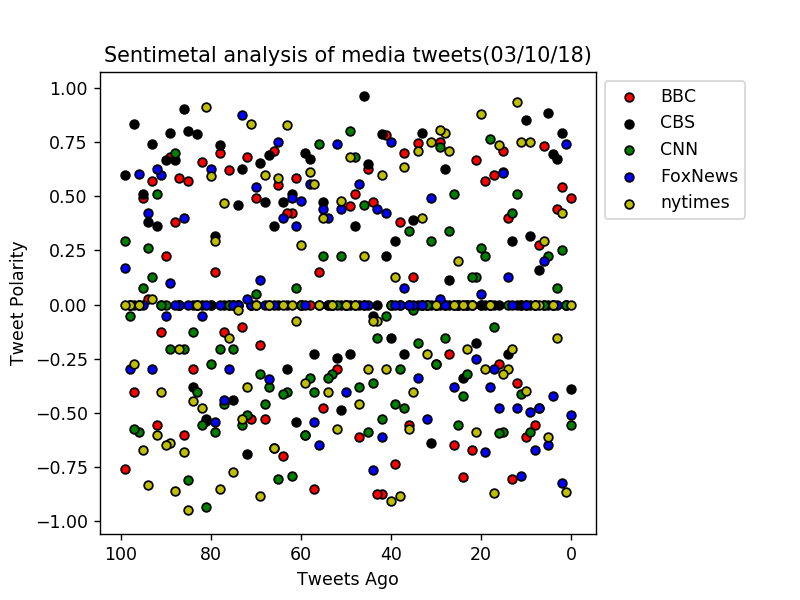

In [10]:
fig1, ax1 = plt.subplots()
x_axis=seniment_data.reset_index()["Tweets ago"].values

s1=ax1.scatter(x_axis, seniment_data["@BBC"].values,marker='.',c='r',label="BBC",edgecolors='k',s=100);
s2=ax1.scatter(x_axis, seniment_data["@CBS"].values,marker='.',c='k',label="CBS",edgecolors='k',s=100);
s3=ax1.scatter(x_axis, seniment_data["@CNN"].values,marker='.',c='g',label="CNN",edgecolors='k',s=100);
s4=ax1.scatter(x_axis, seniment_data["@FoxNews"].values,marker='.',c='b',label="FoxNews",edgecolors='k',s=100);
s5=ax1.scatter(x_axis, seniment_data["@nytimes"].values,marker='.',c='y',label="nytimes",edgecolors='k',s=100);




box = ax1.get_position()
pos=ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])


leg=ax1.legend(loc='upper left', bbox_to_anchor=(1, 1.0))
plt.gca().invert_xaxis()

from datetime import date
title=ax1.set_title(f"Sentimetal analysis of media tweets({date.today().strftime('%d/%m/%y')})");
xlabel=ax1.set_xlabel("Tweets Ago")
ylabel=ax1.set_ylabel("Tweet Polarity")
plt.savefig('tweets.png')

<IPython.core.display.Javascript object>


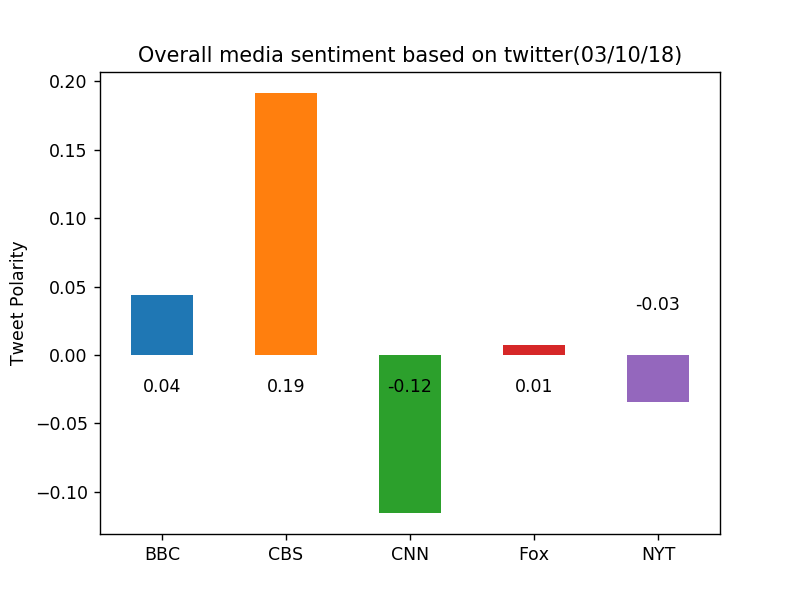

In [11]:
fig2, ax2 = plt.subplots()
bar=sentiment_data.mean().plot(kind='bar',ax=ax2,rot=0)
xtick_label=ax2.set_xticklabels(["BBC","CBS","CNN","Fox","NYT"])
xlabel=ax2.set_xlabel("")
ylabel=ax2.set_ylabel("Tweet Polarity")
title=ax2.set_title(f"Overall media sentiment based on twitter({date.today().strftime('%d/%m/%y')})")

def labelbar(x,y,t):
    txt=ax2.text(x, y,t,ha='center', va='bottom')

x=ax2.get_xticks()
y=4*[-0.03]+[0.03]
t = [round(Decimal(sentiment_data.mean().values[i]),2) for i in range(len(x))]

for i in range(len(x)):
    labelbar(x[i],y[i],str(t[i]))
# Save the Figure
plt.savefig('sentiment.png')

In [12]:
seniment_data.to_csv("sentiment_data.csv")
tweet_df.to_csv("tweet_data.csv")

In [ ]:
Observation

1. CNN has the most negative sentiment and BBC is the only one that has positve sentiment compound.
2. The sentiment of each user changes greatly as time passed.
3. A great number twitters are neutral sentiment.


